In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
import tadasets
import plotly.graph_objects as go

In [2]:
import networkx as nx
import copy

In [3]:
from TDAclustering import *
from TDAclusteringDatasets import *
from TDAclusteringEvaluation import *
from TDAclusteringMapper import *
from TDAclusteringStateDiagrams import *
from TDAclusteringUtils import *
from TDAclusteringVisualization import *


In [6]:
x = create_3_cycles(n=315, d=1, r=4, noise=0.0001)

In [9]:
result = ripser(x, do_cocycles=True)
diagrams = result['dgms']
cocycles = result['cocycles']
D = result['dperm2all']

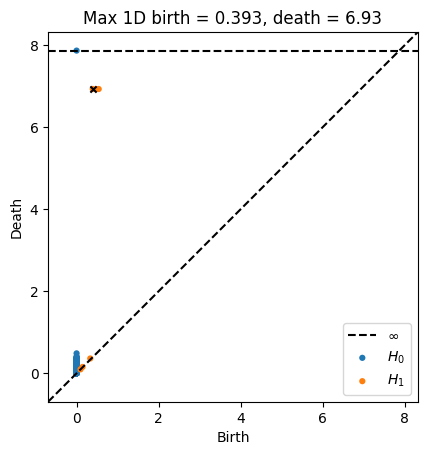

2

In [10]:
show_diagram(diagrams)

number of downsampled points:
460
no calculation of otsu threshold
number of sufficiently persistent homology groups:
3
nr. of labels before removal of unimportant labels:
3
nr. of labels after removal of unimportant labels:
3
nr. of labels before removal of unimportant clusters:
6
nr. of labels after removal of unimportant clusters:
6
nr. of labels after removal of unimportant clusters by specifying nr. of clusters:
6
[1 2 3 4 5 6]


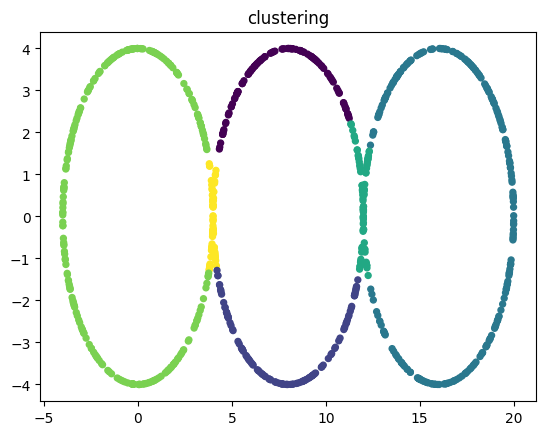

In [12]:
clustering1 = apply_tda_clustering(x, all_get_label=True, point_fraction=0.5, target_r=False, target_radius_fraction=0.01, downsampling=True, thresh_function=None, include_neighbors=True, barycenter_assignment=False, density_assignment=False, discard_labels=True, discard_clusters=True, min_support_labels=10, min_thresh_labels=0.2, max_correl=0.8, min_support_clusters=20, min_thresh_clusters=0.2, nr_clusters=8, nearest_on_trajectory=False, only_decision_labels=True, remove_small=False, birth_weight=1, sub_const=0,  return_threshes = True, plot_something=False, print_something=False)
plot_simple(x,clustering1, remove_0=True)
print(np.unique(clustering1))
plt.show()


number of sufficiently persistent homology groups:
3
nr. of labels before removal of unimportant labels:
3
nr. of labels after removal of unimportant labels:
3
nr. of labels before removal of unimportant clusters:
6
nr. of labels after removal of unimportant clusters:
6
[1 2 3 4 5 6]


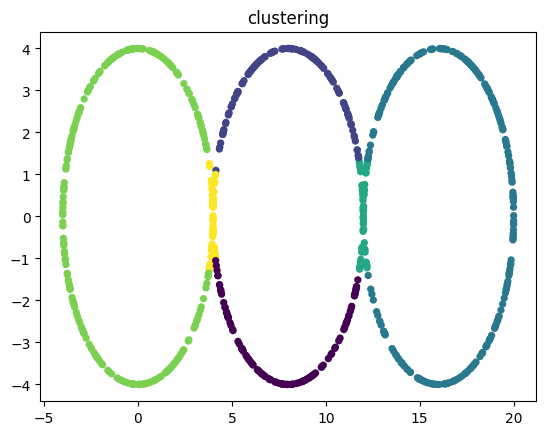

In [13]:
clustering2 = apply_tda_clustering(x, all_get_label=True, thresh_function=None, include_neighbors=True, barycenter_assignment=False, density_assignment=True, discard_labels=True, discard_clusters=True, min_support_labels=10, min_thresh_labels=0.2, max_correl=0.8, min_support_clusters=20, min_thresh_clusters=0.2, nearest_on_trajectory=False, only_decision_labels=True, remove_small=False, birth_weight=1, sub_const=0,  return_threshes = True, plot_something=False, print_something=False)
plot_simple(x,clustering2, remove_0=True)
print(np.unique(clustering2))
plt.show()

number of sufficiently persistent homology groups:
3
nr. of labels before removal of unimportant labels:
3
nr. of labels after removal of unimportant labels:
3
nr. of labels before removal of unimportant clusters:
6
nr. of labels after removal of unimportant clusters:
6
[1 2 3 4 5 6]


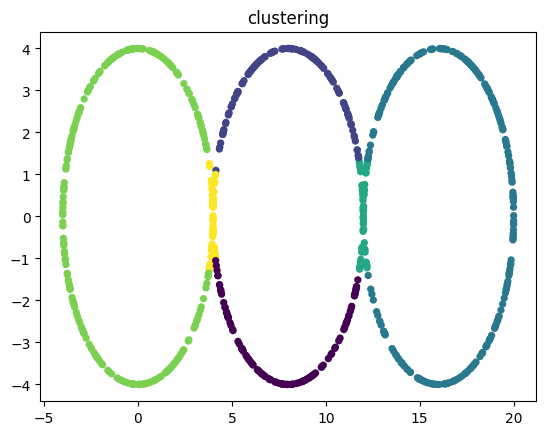

In [14]:
clustering3 = apply_tda_clustering(x, all_get_label=True, thresh_function=None, include_neighbors=True, barycenter_assignment=True, density_assignment=False, discard_labels=True, discard_clusters=True, min_support_labels=10, min_thresh_labels=0.2, max_correl=0.8, min_support_clusters=20, min_thresh_clusters=0.2, nearest_on_trajectory=False, only_decision_labels=True, remove_small=False, birth_weight=1, sub_const=0,  return_threshes = True, plot_something=False, print_something=False)
plot_simple(x,clustering3, remove_0=True)
print(np.unique(clustering3))
plt.show()

number of sufficiently persistent homology groups:
3
nr. of labels before removal of unimportant labels:
3
nr. of labels after removal of unimportant labels:
3
nr. of labels before removal of unimportant clusters:
5
nr. of labels after removal of unimportant clusters:
5
[1 2 3 4 5]


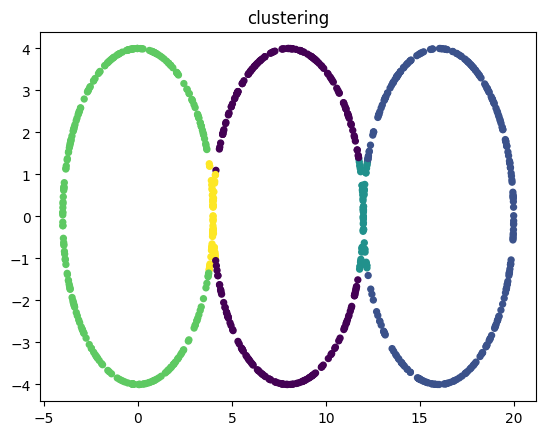

In [15]:
clustering4 = apply_tda_clustering(x, all_get_label=True, thresh_function=None, include_neighbors=True, barycenter_assignment=True, density_assignment=False, discard_labels=True, discard_clusters=True, min_support_labels=10, min_thresh_labels=0.2, max_correl=0.8, min_support_clusters=20, min_thresh_clusters=0.2, nearest_on_trajectory=False, only_decision_labels=False, remove_small=False, birth_weight=1, sub_const=0,  return_threshes = True, plot_something=False, print_something=False)
plot_simple(x,clustering4, remove_0=True)
print(np.unique(clustering4))
plt.show()

In [16]:
import sklearn

In [17]:
from sklearn.cluster import *

In [18]:
kmeans = KMeans(n_clusters=6,  n_init="auto").fit(x).labels_
dbscan = DBSCAN(eps=0.3, min_samples=2).fit(x).labels_
hdbscan = HDBSCAN().fit(x).labels_


In [20]:
np.unique(kmeans)

array([0, 1, 2, 3, 4, 5])

In [21]:
np.unique(dbscan)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22], dtype=int64)

In [22]:
np.unique(hdbscan)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70], dtype=int64)

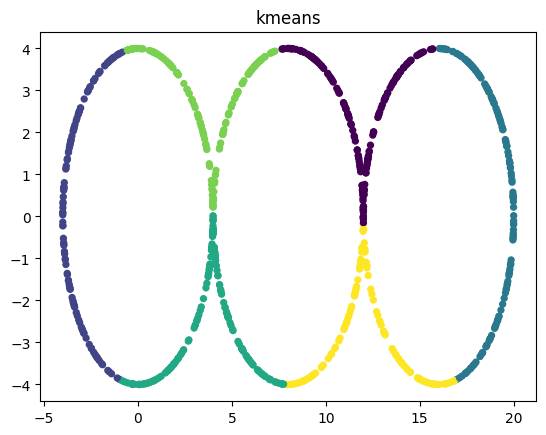

In [23]:
plot_simple(x, list(kmeans), title="kmeans")

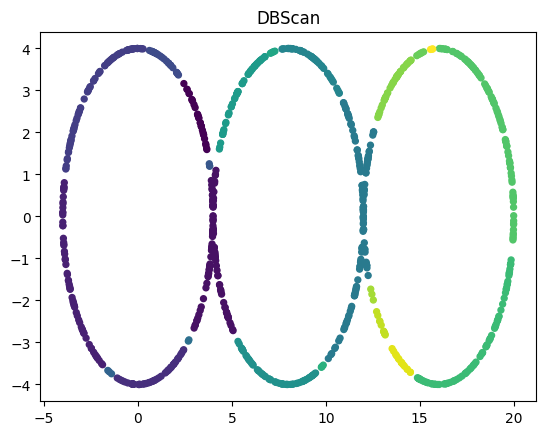

In [24]:
plot_simple(x, list(dbscan), title="DBScan")

number of sufficiently persistent homology groups:
3


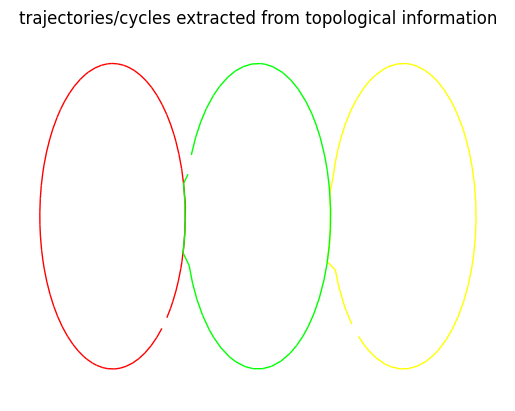

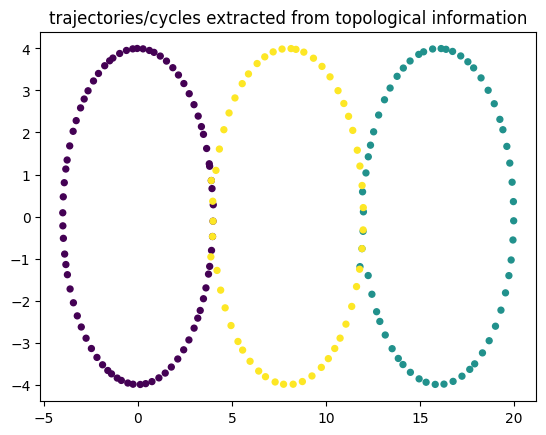

[1 2 3 4 5 6]


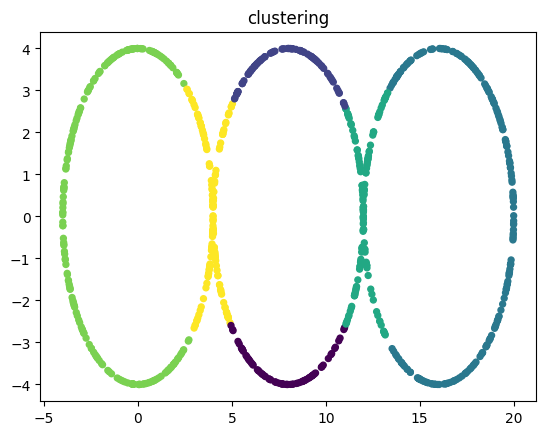

In [25]:
clustering_traj1_graph, clustering_traj1_sub, clustering_traj1_labels = apply_tda_clustering_trajectories(x, all_get_label = False, discard_labels=False, discard_clusters=False, nearest_on_trajectory=False, only_decision_labels=True)
plt.show()
plot_simple(x,clustering_traj1_labels, remove_0=False)
print(np.unique(clustering_traj1_labels))
plt.show()


number of sufficiently persistent homology groups:
3


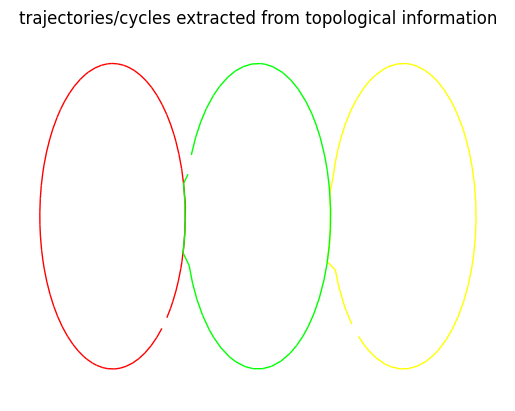

nr. of labels before removal of unimportant labels:
3
nr. of labels after removal of unimportant labels:
3
nr. of labels before removal of unimportant clusters:
6
nr. of labels after removal of unimportant clusters:
6


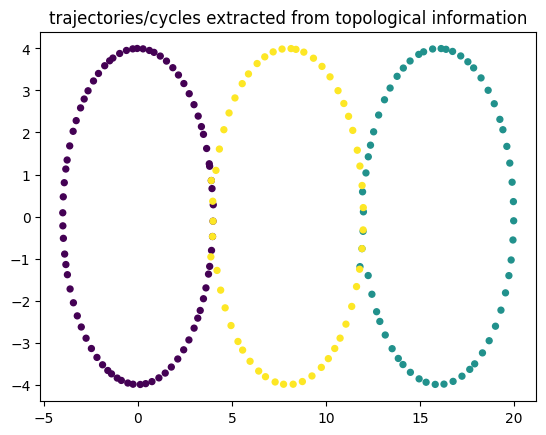

[1 2 3 4 5 6]


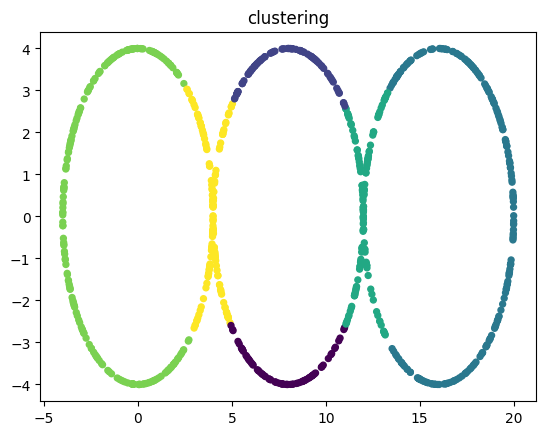

In [26]:
clustering_traj2_graph, clustering_traj2_sub, clustering_traj2_labels = apply_tda_clustering_trajectories(x, all_get_label = False, discard_labels=True, discard_clusters=True, nearest_on_trajectory=True, remove_small=True, only_decision_labels=True)
plt.show()
plot_simple(x,clustering_traj2_labels, remove_0=False)
print(np.unique(clustering_traj2_labels))
plt.show()


number of sufficiently persistent homology groups:
3


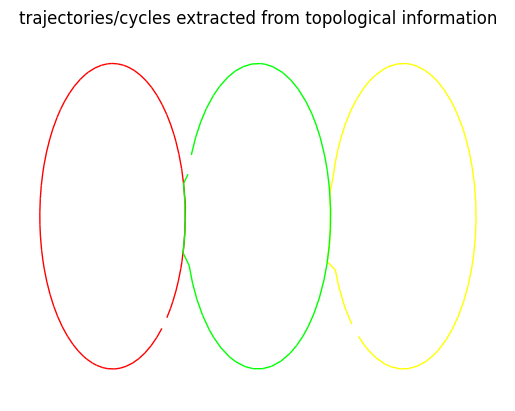

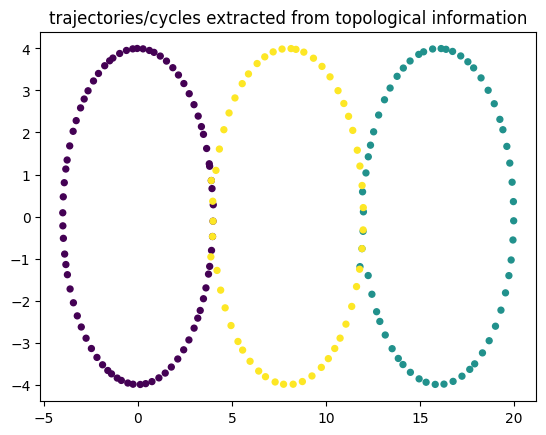

[1 2 3 4 5 6]


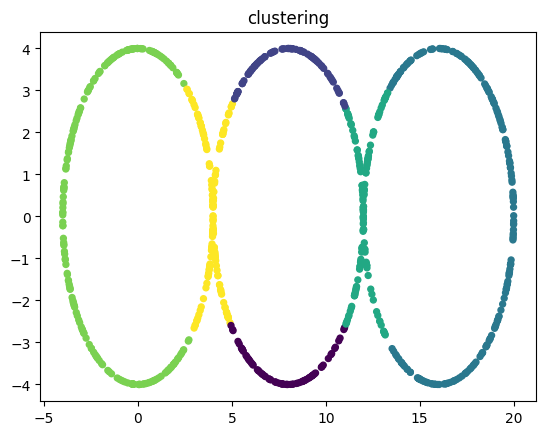

In [27]:
clustering_traj3_graph, clustering_traj3_sub, clustering_traj3_labels = apply_tda_clustering_trajectories(x, all_get_label = True, discard_labels=False, discard_clusters=False, nearest_on_trajectory=False, only_decision_labels=True)
plt.show()
plot_simple(x,clustering_traj3_labels, remove_0=False)
print(np.unique(clustering_traj3_labels))
plt.show()


function only available for 3D data
number of sufficiently persistent homology groups:
3


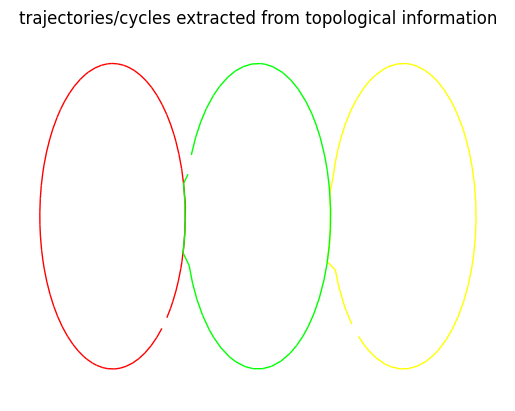

nr. of labels before removal of unimportant labels:
3
nr. of labels after removal of unimportant labels:
3


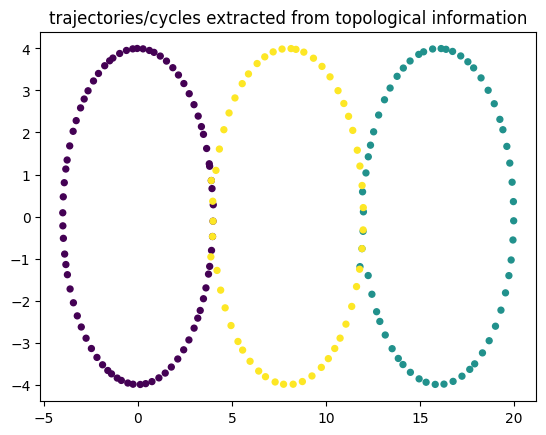

[1 2 3 4 5]


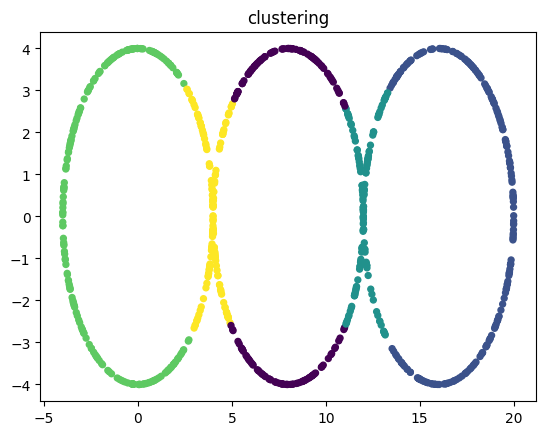

In [28]:
clustering_traj6_graph, clustering_traj6_sub, clustering_traj6_labels = apply_tda_clustering_trajectories(x, all_get_label = True, num_voxels_per_axis = 15, min_points_per_voxel=1, smoothing=True, discard_labels=True, discard_clusters=False, nearest_on_trajectory=False, only_decision_labels=False, nr_clusters=8)
plt.show()
plot_simple(x,clustering_traj6_labels, remove_0=False)
print(np.unique(clustering_traj6_labels))
plt.show()


function only available for 3D data
number of sufficiently persistent homology groups:
3


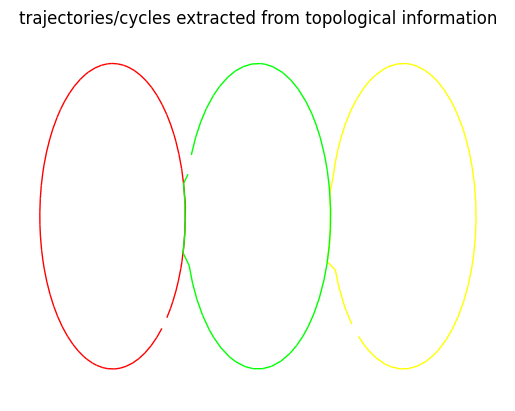

nr. of labels before removal of unimportant labels:
3
nr. of labels after removal of unimportant labels:
3
nr. of labels before removal of unimportant clusters:
6
nr. of labels after removal of unimportant clusters:
6
nr. of labels after removal of unimportant clusters by specifying nr. of clusters:
6


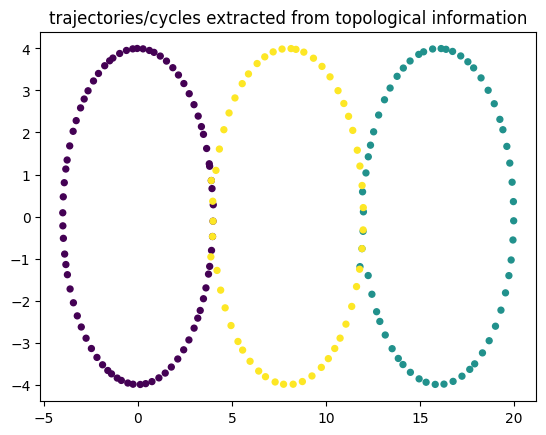

[1 2 3 4 5 6]


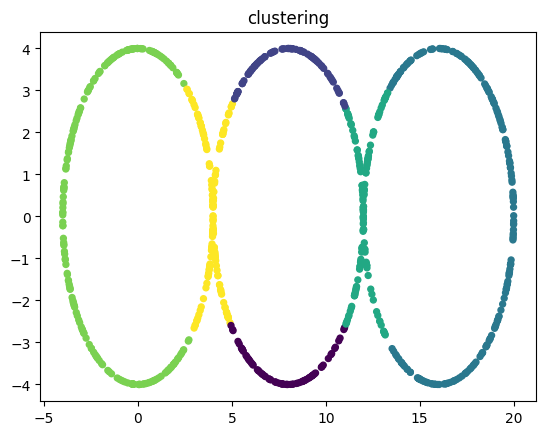

In [29]:
clustering_traj7_graph, clustering_traj7_sub, clustering_traj7_labels = apply_tda_clustering_trajectories(x, all_get_label = True, num_voxels_per_axis = 15, min_points_per_voxel=1, smoothing=True, discard_labels=True, discard_clusters=True, nearest_on_trajectory=False, only_decision_labels=True, nr_clusters=8)
plt.show()
plot_simple(x,clustering_traj7_labels, remove_0=False)
print(np.unique(clustering_traj7_labels))
plt.show()


number of downsampled points:
97
no calculation of otsu threshold
number of sufficiently persistent homology groups:
3


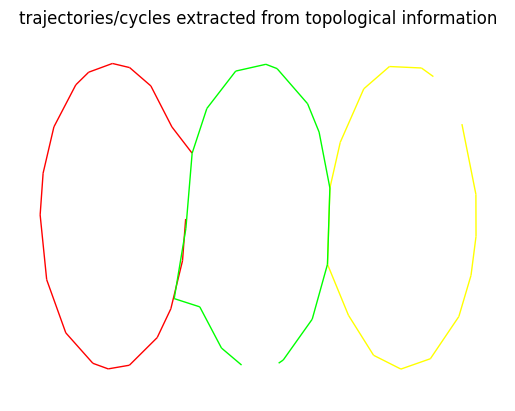

nr. of labels before removal of unimportant labels:
3
nr. of labels after removal of unimportant labels:
3
nr. of labels before removal of unimportant clusters:
6
nr. of labels after removal of unimportant clusters:
6
nr. of labels after removal of unimportant clusters by specifying nr. of clusters:
6


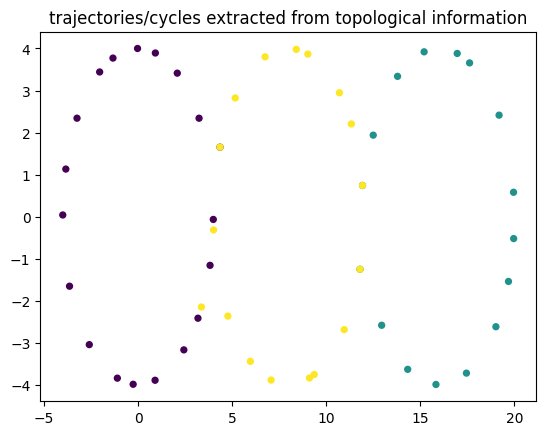

[1 2 3 4 5 6]


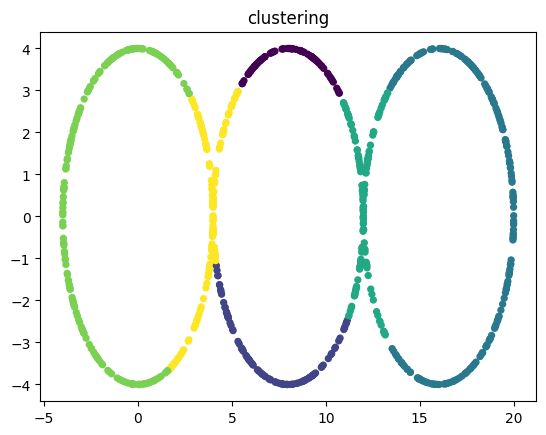

In [30]:
clustering_traj9_graph, clustering_traj9_sub, clustering_traj9_labels = apply_tda_clustering_trajectories(x, all_get_label = True, point_fraction=0.1, target_r=False, target_radius_fraction=0.05, downsampling=True, discard_labels=True, discard_clusters=True, nearest_on_trajectory=False, only_decision_labels=True, nr_clusters=8)
plt.show()
plot_simple(x,clustering_traj9_labels, remove_0=False)
print(np.unique(clustering_traj9_labels))
plt.show()
